Time series Analysis

a time series is a collection of observations made sequentially in time. Example of timeseries is economic, physical, marketing and demographic timeseries.Components of time series are:

1. Trend. this is the long term change in the mean level of time series.It can be linear increasing/decreasing, non-linear increasing/decreasing or oscillatory.

2. Seasonal variation. These are movements that occur in a timeseries within a period of one year. Examples are Christmas, weather seasons like autumn,sping ,winter and summer, Easter etc.

3. cyclical effects. These are variations in time series with a period not aqual to one year. Example boom, recession, recovery,depression.

4. Random effects. This are variations in a time series which are due to unpredictable factors thus they are sporadic. They include earthquakes, floods or tsunamis etc

Below is an implementation of timeseries analysis of beer production in Australia

In [22]:
# importing prerequisite libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 
import numpy as np

In [23]:
#uploading our dataset from alocal directory
df = pd.read_csv(r'C:/Users/test/Documents/tochora/baba/monthly-beer-production-in-austr.csv')
df.head()

,Month,Monthly beer production in Australia
0,1956-01,93.2
1,1956-02,96.0
2,1956-03,95.2
3,1956-04,77.1
4,1956-05,70.9


In [24]:
# renaming beer production column into a more shortened version of it
df.rename(columns={'Monthly beer production in Australia': 'beer_production'},inplace=True)

our Month column is in object form.In order to plot our data we have to convert it into datetime and set it as the index of our dataset.

In [25]:
# converting month column into a datetime
df['Month'] = pd.to_datetime(df['Month'],infer_datetime_format=True)
#setting month column as the index
indexeddataset = df.set_index('Month')
# a quick overview of the data in our dataset
print(indexeddataset.head())

            beer_production
Month                      
1956-01-01             93.2
1956-02-01             96.0
1956-03-01             95.2
1956-04-01             77.1
1956-05-01             70.9


Visualization of the beer production  in our dataset

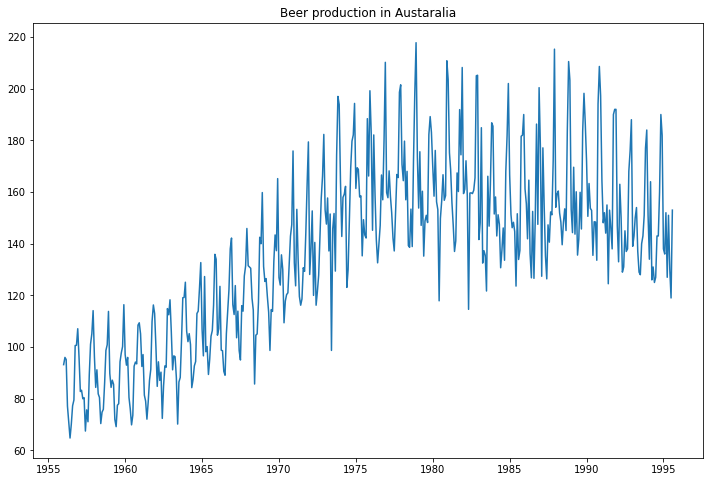

In [26]:
plt.figure(figsize=(12, 8))
plt.plot(indexeddataset)
plt.title('Beer production in Austaralia')
plt.show()

from the figure above it shows that there wasa gradual rise in beer production from 1950s  which  peaked in 1975 but started falling after 1990.

Rolling statistics

it is used to plot the moving average or moving standard deviation to check whether it varies with time.The window input states the period used to take an average or standard deviation.

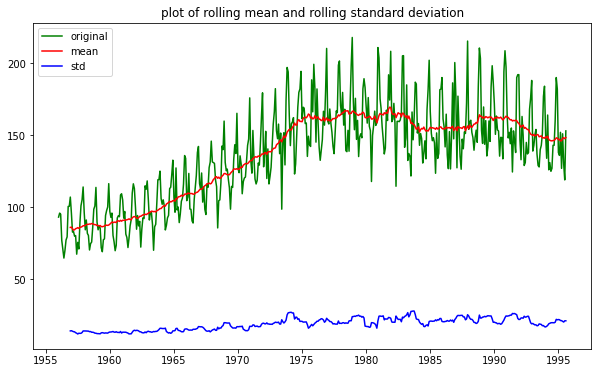

In [27]:
# a plot of moving average and moving standard deviation
plt.figure(figsize=(10, 6))
rolmean = indexeddataset.rolling(window=12).mean()
rolstd = indexeddataset.rolling(window=12).std()
plt.plot(indexeddataset,label='original', color='green')
plt.plot(rolmean, label='mean', color='red')
plt.plot(rolstd,label='std',color='blue')
plt.legend(loc='best')
plt.title('plot of rolling mean and rolling standard deviation')
plt.show()

stationarity

A time series is stationary if there isn't systematic change in mean(no trend), variance and if periodic variations have been removed. There are various ways of making a timeseries stationary, which are:

1. Logarithmic transformation

2. Differencing

Dickey-fuller test

Dickey fuller test is used to test whether a timeseries has a unit root. if a unit root is present then the timeseries is non-stationary but if it doesnt have it, then it is stationeary. The formula for dickey fuller test is yt = ayt - U where a = alpha - 1, yt is a random walk and U is an error term.
In order to test stationarity, we take the hypothesis that if: p_value is less than a i.e 0.05 then our timeseries is stationary else it is non stationary.

In [28]:
# import dickey fuller package from statsmodels
from statsmodels.tsa.stattools import adfuller
print('Results of adfuller test:')
dftest = adfuller(indexeddataset['beer_production'], autolag='AIC')
dfoutput = pd.Series(dftest[0:4], index=['Test statistic', 'p_value', '#lags used', 'No of observations'])
for key, value in dftest[4].items():
    dfoutput['Critical value at (%s)'%key] = value
print(dfoutput)


Results of adfuller test:
Test statistic              -2.282661
p_value                      0.177621
#lags used                  17.000000
No of observations         458.000000
Critical value at (1%)      -3.444709
Critical value at (5%)      -2.867871
Critical value at (10%)     -2.570142
dtype: float64


p_value is 0.177621 which is greater than 0.05 thus we should reject the null hypothesis that our timeseries is stationary. thus, we will need to undertake varios methods of making it stationary.Below is a function of plotting and displaying values of our timeseries if we try to make it stationary.

In [29]:
# a function of checking whether various methods of making a timeseries stationary have worked well.
def test_stationarity(timeseries):
    rolmean = timeseries.rolling(window=12).mean()
    rolstd = timeseries.rolling(window=12).std()
    plt.figure(figsize=(8, 6))
    plt.plot(timeseries, label='original', color='green')
    plt.plot(rolmean, label='mean',color='red')
    plt.plot(rolstd, label='std',color='blue')
    plt.legend(loc='best')
    plt.title('relationshp between rolmean and rolstd')
    plt.show()
    print('results of adfuller test:')
    dftest = adfuller(timeseries['beer_production'],autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p_value', 'lags used', 'No of observations used'])
    for key, value in dftest[4].items():
        dfoutput['Critical value is (%s)'%key] = value
    print(dfoutput)


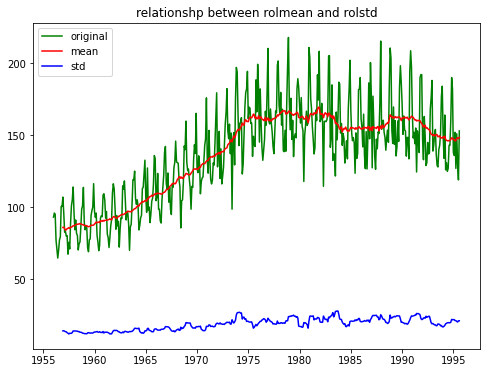

results of adfuller test:
Test Statistic              -2.282661
p_value                      0.177621
lags used                   17.000000
No of observations used    458.000000
Critical value is (1%)      -3.444709
Critical value is (5%)      -2.867871
Critical value is (10%)     -2.570142
dtype: float64


In [30]:
test_stationarity(indexeddataset)

The plot above shows that both rolling mean and standard deviation are changing with time thus they are not stationary

1.logarithmic transformation.
In this method we take logarithms of values in our data in order to make them stationary

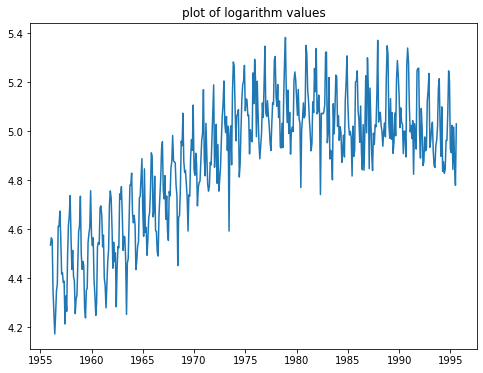

In [31]:
# taking logs of values in our data
log_dataset = np.log(indexeddataset)
# plotting of logged values
plt.figure(figsize=(8, 6))
plt.plot(log_dataset)
plt.title("plot of logarithm values")
plt.show()

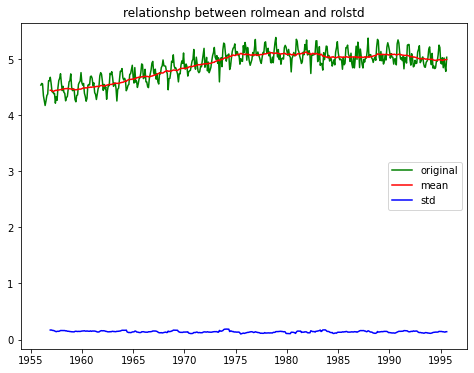

results of adfuller test:
Test Statistic              -2.800769
p_value                      0.058164
lags used                   17.000000
No of observations used    458.000000
Critical value is (1%)      -3.444709
Critical value is (5%)      -2.867871
Critical value is (10%)     -2.570142
dtype: float64


In [32]:
# finding whether  logarithm has made our timeseries stationary
test_stationarity(log_dataset)

The plot of standard deviation is almost stationary given it's slightly changing above zero whereas there are various variation in rolling mean thus it is not stationary. furthermore

The p-value is 0.058164 resulting from logarithmic transformation is slightly higher than the equired value of 0.05.Thus we should reject the null hypothsis since it fails to make our timeseries stationary.

Diffrencing

In this method we make a trend stationary by taking a difference of two periods.in this case, we get a variabe by substracting an entrie from the previous value of a time series into the present one in order to make it stationary.

In [33]:
# substracting 
dataset_lodiffrencing = log_dataset - log_dataset.shift()
print(dataset_lodiffrencing.head(12))
# dropping null values
dataset_lodiffrencing.dropna(inplace=True)


            beer_production
Month                      
1956-01-01              NaN
1956-02-01         0.029600
1956-03-01        -0.008368
1956-04-01        -0.210877
1956-05-01        -0.083833
1956-06-01        -0.089965
1956-07-01         0.078617
1956-08-01         0.097771
1956-09-01         0.028063
1956-10-01         0.235395
1956-11-01         0.000994
1956-12-01         0.061617


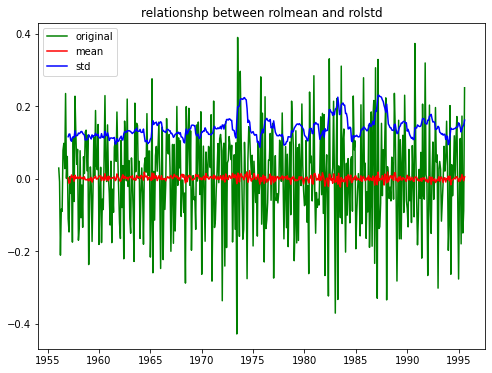

results of adfuller test:
Test Statistic              -4.869646
p_value                      0.000040
lags used                   18.000000
No of observations used    456.000000
Critical value is (1%)      -3.444772
Critical value is (5%)      -2.867899
Critical value is (10%)     -2.570157
dtype: float64


In [34]:
# checking whether diffrencing makes our timeseries stationary
test_stationarity(dataset_lodiffrencing)

The plot above shows rolling mean is stationary but there are variations on the standard deviation plot. A look at dickey-fuller test on p-values shows that it is 0.0004 which is less than 0.05 thus we should accept the null hypothesis that our timeseries is stationary and we can make predictions with it.

In [35]:
# getting the appropriate order values
from statsmodels.tsa.stattools import arma_order_select_ic
print(arma_order_select_ic(dataset_lodiffrencing))

c:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'
c:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
c:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.war

{'bic':             0           1           2
0 -535.008171 -558.389288 -611.393304
1 -552.967020 -632.106180 -558.968954
2 -554.251453 -560.265879 -626.730149
3 -549.065909 -554.191825 -620.702294
4 -555.632238 -667.691234 -667.993637, 'bic_min_order': (4, 2)}


c:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


Sarimax model

This is an extension of Arima model but it deals with seasonal data. It divides data into seasonal and non-seasonal components. It is characterised by 7  parameters,for non-seasonal or trend part(p, d,q) parameters (p => Number of lag observations, d => Number of times raw observations differenced, q=> size of moving average window) which are same as for Arima model and seasonal part(p,d,q,m) parameters where 'm' is the number of seasonal periods.

In [36]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
# initializing our model
modell = SARIMAX(dataset_lodiffrencing['beer_production'], order=(2, 1,3), seasonal_order=(2, 1, 3, 4))
#fitting our model
results_Arima = modell.fit()
results_Arima.summary()


c:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\test\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                   beer_production   No. Observations:                  475
Model:             SARIMAX(2, 1, 3)x(2, 1, 3, 4)   Log Likelihood                 476.214
Date:                           Sun, 07 May 2023   AIC                           -930.427
Time:                                   12:45:58   BIC                           -884.747
Sample:                               02-01-1956   HQIC                          -912.456
                                    - 08-01-1995                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.1394      0.009   -129.526      0.000      -1.157      -1.122
ar.L2         -0.9790      0.009   -114.184      0.000      -0.996      -0.962
ma.L1          0.0156      1.805      0.009      0.993      -3.522       3.553
ma.L2         -0.0600      1.836     -0.033      0.974      -3.659       3.539
ma.L3         -0.9550      1.729     -0.552      0.581      -4.343       2.433
ar.S.L4       -0.9953      0.014    -72.065      0.000      -1.022      -0.968
ar.S.L8       -0.9665      0.012    -77.405      0.000      -0.991      -0.942
ma.S.L4        0.0059      0.053      0.111      0.912      -0.099       0.111
ma.S.L8       -0.2362      0.043     -5.450      0.000      -0.321      -0.151
ma.S.L12      -0.7179      0.050    -14.398      0.000      -0.816      -0.620
sigma2         0.0071      0.013      0.553      0.580      -0.018       0.032
===================================================================================
Ljung-Box (L1) (Q):                  62.89   Jarque-Bera (JB):                25.54
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               1.80   Skew:                             0.09
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

On the summarry we should look:

Log-likelihood is 476.215.This value is used to measure model performance in relation to other models. The higher value it is, the better the model. It is not helpful here since we don't have other models in this notebook.

Akaike Information Criteria(AIC) is -930.889.This is a metric that helps us to evaluate strength of our model by penalising the number of parameters added in a model to increase its max-likelihood thus finding a model with few parameters that fit data well. a lower value of AIC is the better one.

Coefficient(coef). It represents the significance of all features

Standard error(std err). It estimates the error of predicted values. It tells the strength of residual error on predicted values.

Z . It is the standardised coefficient.

p>[z]. It is the p_value of the coefficient.It is better to look at p_values as if they are greater than the stated threshhold i.e 0.05 then you might be using a coefficient that may bring unreliable results.

here we are going to make predictions using our model and since our values are in logarithmic form, we will sum them and find antilog of those predictions

In [37]:
# making predictions
predictions_arima = pd.Series(results_Arima.fittedvalues, copy=True)
predictions_arima.head()

Month
1956-02-01    0.000000
1956-03-01    0.029600
1956-04-01   -0.008368
1956-05-01   -0.210877
1956-06-01   -0.069033
dtype: float64

In [38]:
# taking the cumulativesum of predictions 
predictions_sum = predictions_arima.cumsum()
print(predictions_sum)

Month
1956-02-01    0.000000
1956-03-01    0.029600
1956-04-01    0.021232
1956-05-01   -0.189644
1956-06-01   -0.258677
                ...   
1995-04-01    0.967134
1995-05-01    1.008060
1995-06-01    0.829785
1995-07-01    0.916503
1995-08-01    1.055034
Length: 475, dtype: float64


In [39]:
#adding cumulative sum values to the values we had taken logarithm of, initially
predictions_arima_log = pd.Series(log_dataset['beer_production'].iloc[0],index=log_dataset.index)
predictions_arima_log = predictions_arima_log.add(predictions_sum, fill_value = 0)
predictions_arima_log.head(5)

Month
1956-01-01    4.534748
1956-02-01    4.534748
1956-03-01    4.564348
1956-04-01    4.555980
1956-05-01    4.345103
dtype: float64

In [40]:
# taking antilog of the predicted values
predictions = np.exp(predictions_arima_log)
print(predictions[:15], indexeddataset[:15])

Month
1956-01-01     93.200000
1956-02-01     93.200000
1956-03-01     96.000000
1956-04-01     95.200000
1956-05-01     77.100001
1956-06-01     71.957141
1956-07-01     63.315941
1956-08-01     49.432075
1956-09-01     47.816986
1956-10-01     56.181453
1956-11-01     67.926851
1956-12-01     75.574343
1957-01-01     83.605609
1957-02-01    103.082496
1957-03-01     98.524908
dtype: float64             beer_production
Month                      
1956-01-01             93.2
1956-02-01             96.0
1956-03-01             95.2
1956-04-01             77.1
1956-05-01             70.9
1956-06-01             64.8
1956-07-01             70.1
1956-08-01             77.3
1956-09-01             79.5
1956-10-01            100.6
1956-11-01            100.7
1956-12-01            107.1
1957-01-01             95.9
1957-02-01             82.8
1957-03-01             83.3


Below is a plot of predicted values in relation to the original values

Text(0.5, 1.0, 'relationship between predictions and the original data')

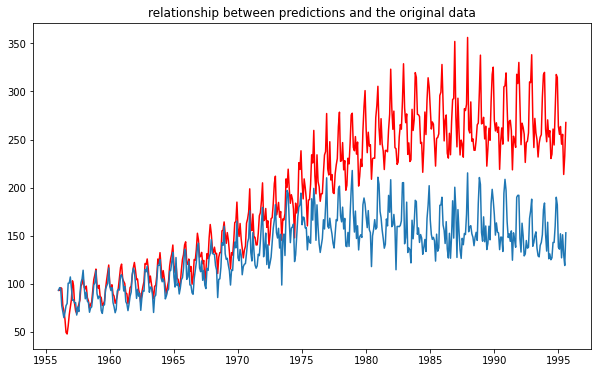

In [41]:
plt.figure(figsize=(10, 6))
plt.plot(predictions, color='red')
plt.plot(indexeddataset)
plt.title("relationship between predictions and the original data")

In the above plot, there is low variation between predicted values and test data but after 1980, the gap between the values widen showing that the model failed to perform effectively after 1985.

In [66]:
indexeddataset['predictions'] = predictions
indexeddataset.head()

,beer_production,forecast,predictions
Month,,,
1956-01-01,93.2,93.2,93.200000
1956-02-01,96.0,93.2,93.200000
1956-03-01,95.2,93.2,96.000000
1956-04-01,77.1,93.2,95.200000
1956-05-01,70.9,93.2,77.100001
